# Geospatial Data Analysis I 

## Inferential and bivariate statistics - Solution

###  Exercise 1: Inferential statistics 

In this exercise, we will take a closer look at the groundwater data from the last lesson, and infer information about the entire population in the area of the Hardtwald forest based on the measured samples. 

First, read in the dataset 'Data_GW_KA.csv' (or the corresponding excel file). 

In [1]:
# [1]
import pandas as pd

data = pd.read_excel("Data_GW_KA.xlsx")


In the last exercise we  already characterised the parameter groundwater temperature, which roughly had the shape of a normal distribution. Now, let's assume you need 50 representative temperature values for some modelling exercise (but you only have 39 measurements). 

In order to generate these 50 values, you can fit a normal distribution to the measured values, and then use Python to create the desired number of random (but representative) values, which should have the same statistical characteristics as the measured data. To do so, you first need to find out which type of normal distribution (mean, std) fits best to the measured data. 

- Use the function `scipy.stats.norm.fit()` to define two outputs ($\mu$, $\sigma$) based on the groundwater tempertaure data as input. 

- Print the mean and standard deviation to inspect them. 

In [2]:
# [2]
from scipy.stats import norm
mean_f, std_f = norm.fit(data['GW_Temperature_°C'])
print (mean_f, std_f)

13.526666666666669 2.0800731413833202


Using the function `scipy.stats.norm.rvs()` you can now generate a specific number of normally distributed values. As inputs for the function you need to specific the mean, the standard deviation, and the number of values (e.g. 50) 

In [3]:
# [3]
import numpy as np

samples = norm.rvs(mean_f, std_f, 50)

Now, have a look at the generated values, especially at their mean value and standard deviation. Are they identical to the empirical values from the measured samples?

In [4]:
# [4]
import statistics

mean_samp = statistics.mean(samples)
std_samp = statistics.stdev(samples)
print (mean_samp, std_samp)

13.676602534030279 2.1813214807802264


Most likely the values for mean and standard deviation differ slightly to the empirical ones. This might be due to the small number (n=50) of generated values. 

- Generate another set of random values, now with n = 500,000 (German principle: "viel hilft viel!")

- Then compare the new mean and standard deviation again to the empirical measures. 

In [5]:
# [5]
samples2 = norm.rvs(mean_f, std_f, 500000)

mean_samp2 = statistics.mean(samples2)
std_samp2 = statistics.stdev(samples2)

print (mean_samp2, std_samp2)

13.528156654925066 2.081184528608267


Mean value and standard deviation should now be close to the empirically derived values. However, the large number of generated values leads to a different issue. 

- Calculate the minimum and maximum value of the generated 500,000 values. Are they physically reasonable, given the range of the measured data? 

In [6]:
# [6]
print (min(samples2), max(samples2))

3.841809246022885 22.50371420887666


Based on the measured data these values seem too small and too high, respectively. The reason is that with this large number of randomly generated values,  some values at the extremely unlikely tails of the distributions get picked as well. 

You can avoid this by working with truncated distributions. The function `scipy.stats.truncnorm.rvs()` can generate such distributions using two scaling parameters (*a*, *b*) to cut off extreme values: 

<img src="https://latex.codecogs.com/gif.latex?a&space;=&space;(minimum&space;-&space;mean)/&space;std" title="a = (minimum - mean)/ std" />

und 

<img src="https://latex.codecogs.com/gif.latex?b&space;=&space;(maximum&space;-&space;mean)/&space;std" title="b = (maximum - mean)/ std" />

- Think of a resonable minimum and maximum value for your theoretical distribution of groundwater temperatures, and calculate *a* and *b* accordingly.

- Use them in `scipy.stats.truncnorm.rvs(a, b, mean, std, size=n)`to generate 500,000 random values, and check the statistical characteristic of those values (e.g. using `scipy.stats.describe()`). 


In [7]:
# [7]
from scipy.stats import truncnorm
from scipy.stats import describe

low = 10.5
upper = 16.6
a = (low - mean_f)/std_f
b = (upper - mean_f)/std_f

print(a, b)

samp_trun = truncnorm.rvs(a, b, mean_f, std_f, size=500000)
describe(samp_trun)

-1.4550770386150131 1.4775121471399126


DescribeResult(nobs=500000, minmax=(10.500048770589883, 16.59996204920623), mean=13.539236515396789, variance=2.3150226584159133, skewness=0.0063242099612215935, kurtosis=-0.8940093646742255)

The new values are much more reasonable to represent groundwater temperatures than the un-truncated ones, and could now be used for further modelling / analyses. 

There are also functions to fit other theoretical distributions beside a normal distribution to exisiting data. You can find an overview on available distributions in `scipy` here: https://docs.scipy.org/doc/scipy/reference/stats.html

To visusalise the measured data and the fitted distribution, we can now plot them using `matplotlib`. 

- First, generate a sequence x-values to plot the probability density function on using `numpy.linspace()`

- Then, calculate the corresponding y-values using `scipy.stats.norm.pdf(x, mean, std)` with the estimated mean and standard deviation from above. 

- Finally, plot the probability density function as a line (`plt.plot(x, y)`), and the measured data as a histogram (`pyplot.hist(data, density =True)`) into the same plot. The argument `density = True` ensures that the measured values of your histogram are normalized to the probability (instead of the frequency).

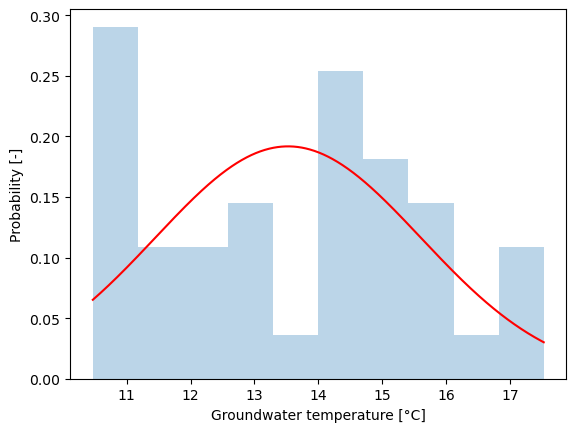

In [8]:
# [8]
import numpy
import matplotlib.pyplot as plt

# generate x-values over range of GWT at which to calculate the probability 
x=numpy.linspace(data['GW_Temperature_°C'].min(),data['GW_Temperature_°C'].max(),1000)

# calculate values of fitted probability function at x 
pdf=norm.pdf(x,mean_f,std_f)

plt.plot(x,pdf,'r-') # plot fitted probability distribution
plt.hist(data['GW_Temperature_°C'], density =True, alpha=.3) # plot original data as histogram 

plt.xlabel('Groundwater temperature [°C]')
plt.ylabel('Probability [-]')

plt.show()

### Exercise 2: Bivariate statistics

After looking at one individual parameter above, we now analyse the relationships between two measured variables. 

First, read in the shortened data set on groundwater in Karlsruhe from Koch et al. (2020) ('Data_GW_KA_short.csv') as a dataframe using pandas. 


In [9]:
# [9]
import pandas as pd
data = pd.read_csv('Data_GW_KA_short.csv', sep=';', encoding='cp1252')

#### Explorative Data Analysis: Histograms and scatterplots

If you are confronted with a new data set, the first step is to get an overview on the measured variables, their values and some basic characteristics. Also, it is recommended to always visualize the data, e.g. with histograms for each parameter, as this is the easiest way to identify outliers, patterns in the data, etc. If interested in the relationship between two variables, a scatterplot is good option. 

The Python package `seaborn` has a very useful function (`seaborn.jointplot()`) to plot the scatterplot of two variables, and the histograms of the marginal distribution in one go. `seaborn` is a Python package similar to `matplotlib`, which is also contained in Anaconda and offers speficic functionalities for visualising data. 

- Import `seaborn` with the abbreviation 'sns', and use `seaborn.jointplot(data=dataframe, x="variable1", y="variable2")` to visualise two measured variables (free choice) from the dataframe. 

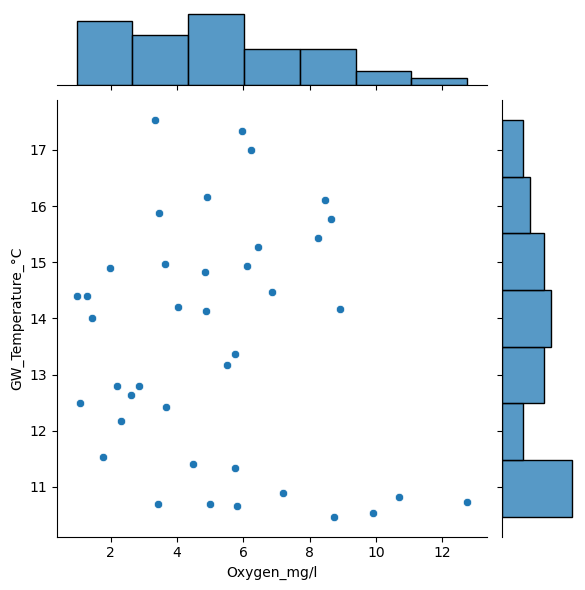

In [10]:
# [10]
import seaborn as sns
#sns.jointplot(data['Oxygen_mg/l'], data['GW_Temperature_°C']) # Option 1 - old seaborn version 
sns.jointplot(data = data, x = 'Oxygen_mg/l', y = 'GW_Temperature_°C') # Option 2 - new seaborn version

plt.show()

To get an quick overview on all bivariate relations in the entire data set, there is the function `seaborn.pairplot()` that combines histograms and scatterplots for all variables. 

- Apply the function `seaborn.pairplot()` to the groundwater data set. Depending on the computational capacity of your laptop this might take a few seconds.

c:\ProgramData\anaconda3\envs\GDA1\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


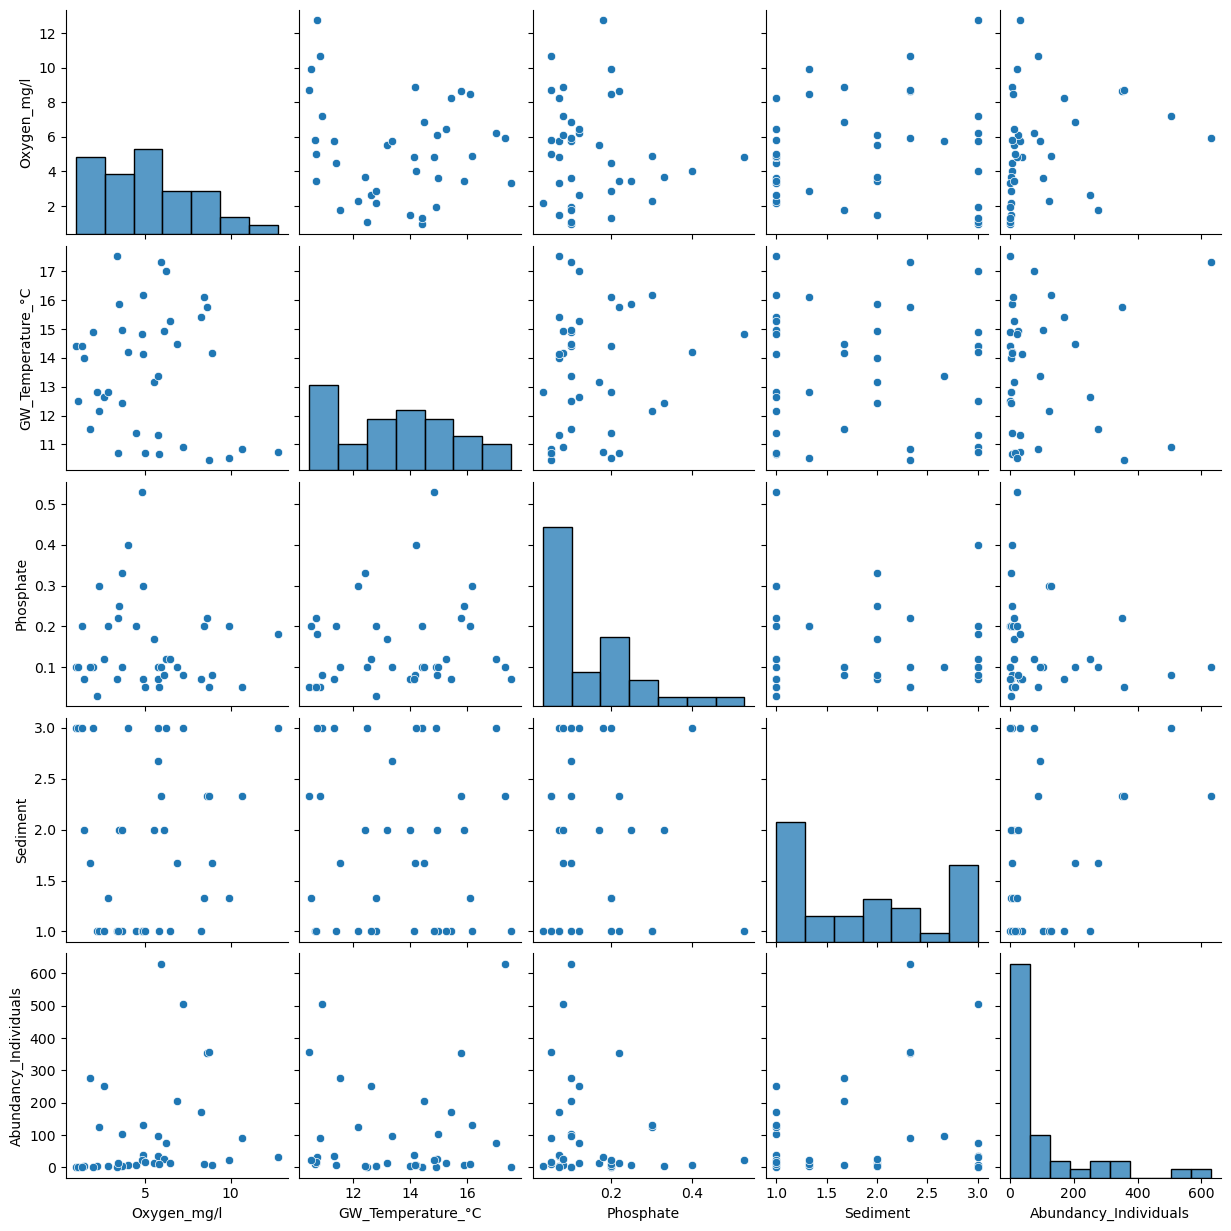

In [11]:
# [11]

sns.pairplot(data)

#plt.show()

#### Correlation coefficients

Now we would like to quantify the relationship between individual variables. The basic measure for this is the covariance: 

<img src="https://latex.codecogs.com/gif.latex?cov_{xy}&space;=&space;\frac{1}{1-n}\sum_{i=1}^{n}(x_{i}-\bar{x})(y_{i}-\bar{y})" title="cov_{xy} = \frac{1}{1-n}\sum_{i=1}^{n}(x_{i}-\bar{x})(y_{i}-\bar{y})" />

To calculate the covariance for all variable pairs in a Pandas DataFrame, you can use the function `pandas.DataFrame.cov()`. 

- First, remove the columns with the well names from the data set to avoid any errors resulting from the string data type `DataFrame.drop(columns = 'Name')`. 

- Then calculate the covariances using `DataFrame.cov()`, and print the resulting covariance matrix. 

- Interpret the shown values with respect to the strength of the bivariate relationship, and compare the covariances with the visual impressression form the figure above. 

In [12]:
# [12]
data = data.drop(columns='Name') # neu in aktueller Pandasverision, string wird nicht mehr automatisch ignoriert

cov_matrix = data.cov()
print(cov_matrix)

                       Oxygen_mg/l  GW_Temperature_°C  Phosphate   Sediment  \
Oxygen_mg/l               8.209471          -0.862375  -0.029748   0.141498   
GW_Temperature_°C        -0.862375           4.440565   0.029929  -0.013659   
Phosphate                -0.029748           0.029929   0.011623  -0.006913   
Sediment                  0.141498          -0.013659  -0.006913   0.648204   
Abundancy_Individuals    97.744211          16.880526  -2.753158  17.569737   

                       Abundancy_Individuals  
Oxygen_mg/l                        97.744211  
GW_Temperature_°C                  16.880526  
Phosphate                          -2.753158  
Sediment                           17.569737  
Abundancy_Individuals           22199.736842  


The strength of the individual relations is not easy to interpret because the values of the variables and thus their (co)variances vary quite a lot. Dividing the covariance by the product of the individual standard deviations solves this problem, and returns Pearson's correlation coefficient. 

- Use the Pandas function `DataFrame.corr()` to calculate the correlation coefficient matrix for your data set, and print it. 

- Compare the results to the covariance matrix and the pairplot above. Which is the variable pair with the strongest linear relationship?

In [13]:
# [13]
corr_matrix = data.corr()
print(corr_matrix)

                       Oxygen_mg/l  GW_Temperature_°C  Phosphate  Sediment  \
Oxygen_mg/l               1.000000          -0.142830  -0.096302  0.061339   
GW_Temperature_°C        -0.142830           1.000000   0.131738 -0.008051   
Phosphate                -0.096302           0.131738   1.000000 -0.079638   
Sediment                  0.061339          -0.008051  -0.079638  1.000000   
Abundancy_Individuals     0.228960           0.053764  -0.171394  0.146466   

                       Abundancy_Individuals  
Oxygen_mg/l                         0.228960  
GW_Temperature_°C                   0.053764  
Phosphate                          -0.171394  
Sediment                            0.146466  
Abundancy_Individuals               1.000000  


Generally, the correlation coefficients in this dataset are quite small. One reason might be that the relations are not strictly linear, but more complex (see pairplot above). 

- Use `scipy.stats.spearmanr(x, y)` to calculate Spearman's correlation coefficient for a chosen variable pair. This function outputs the correlation coefficient (statistic) and the p-value (measure for the statistical significance, more on that later...)

- Compare the Spearman coefficient to the one from Pearson above. Do the values differ, and what does this mean for the kind of bivariate relationship?  

In [14]:
# [14]
import scipy as sp

sp.stats.spearmanr(data['Phosphate'],data['GW_Temperature_°C'])


SignificanceResult(statistic=0.21093697603801986, pvalue=0.19739724018851484)

As mentioned on the slides, there is a third commonly-used correlation coefficient, which can also be used for discrete and ordinal data. 

- Pick a suitable variable pair from the dataset, and use `scipy.stats.kendalltau()` to calculate Kendall's correlation coefficient. 

- Check for differences between Pearson's, Spearman's and Kendall's correlation coefficient and interpret them. 

In [15]:
# [15]
# Kendall's tau for sediment as discrete ordinal variable 
r_tau = sp.stats.kendalltau(data['Sediment'],data['Abundancy_Individuals'])

# Pearson and Spearman for comparison 
r_pear = sp.stats.pearsonr(data['Sediment'],data['Abundancy_Individuals'])
r_spear = sp.stats.spearmanr(data['Sediment'],data['Abundancy_Individuals'])


print (r_pear, r_spear, r_tau )

PearsonRResult(statistic=0.14646557616592312, pvalue=0.3736111785965323) SignificanceResult(statistic=-0.07098288249384602, pvalue=0.667626508259695) SignificanceResult(statistic=-0.05154355799732965, pvalue=0.6701212825532348)


A nice way to visualise matrix values (e.g. from a correlation matrix) is a heatmap plot. 

- Use `seaborn.heatmap(data)` to visualise the correlation matrix from Pandas above. By adding the argument `annot=True` you can plot the numbers of the coefficients as well. 

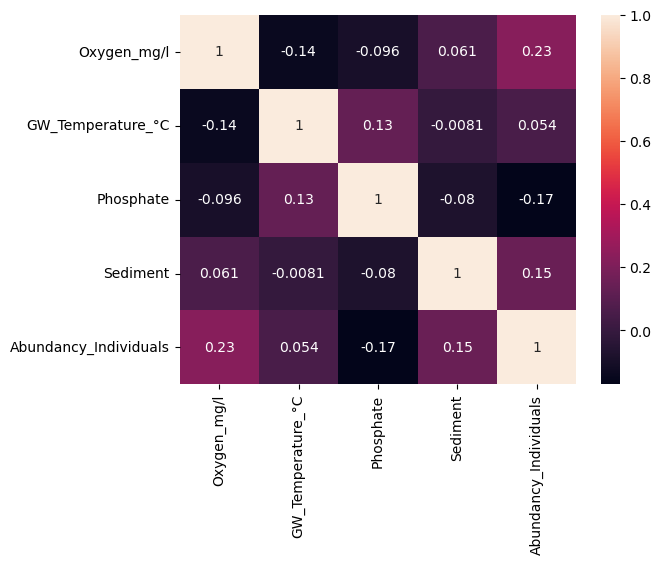

In [16]:
# [16]
sns.heatmap(corr_matrix, annot=True)
plt.show()

If there is time left you can visit the seaborn webpage (https://seaborn.pydata.org/examples/index.html) to see more examples of data visualisation. 

### END

#### References: 

Koch et al. (2020), Groundwater fauna in an urban area: natural or affected? https://hess.copernicus.org/preprints/hess-2020-151/hess-2020-151.pdf
